# Data Cleaning: Outliers

Learning Objectives:
* Students will learn about sources of and classifications for outliers.
* Students will practice common methods of identifying and dealing with outliers.
* Students will apply different scaling techniques that are robust to outliers.

Readings before class:
* Sergio Santoya's [A Brief Overview of Outlier Detection Techniques](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561)
* Wikipedia's [Anomoly Detection article section on "Popular techniques"](https://en.wikipedia.org/wiki/Anomaly_detection#Popular_techniques)
* Sci-Kit Learn's article [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

Reference:
* More anomaly detection demonstrations with visualization from Susan Li's [Anomaly Detection for Dummies](https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1)
* An empirical study and online datasets for anomaly detection: Campos et el. [On the Evaluation of Unsupervised Outlier Detection: Measures, Datasets, and an Empirical Study](https://www.dbs.ifi.lmu.de/research/outlier-evaluation/) 2016.

Before class:
* Read the readings listed above and fill out the "TO-DO" sections with your answers.

In class:
* We will work through one outlier example together and solve the remaining example in small groups.

Homework after class:
* Complete the section labeled "Homework" below before the next class when it will be collected.


In [2]:
# Imports

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import fetch_california_housing, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


# Data Cleaning: Outliers

Another common task of data cleaning is the identification (i.e. "detection") of outliers in data.  This is also called _anomaly detection_.  Regardless of the name, outliers are values that are improbably different from other data so as to invite question of whether the data observations are valid or not.  As with missing values, a good understanding of the problem domain is important for determining both the validity of data and the proper handling of it.

**TO-DO:** Copy the list of "Most common causes of outliers on a data set" from the Santoya article here and describe a specific plausible example of each.  The first is done for you.

Most common causes of outliers on a data set:
* Data entry errors (human errors) - example: a missing or extra decimal point in floating-point data



## Categorical Outliers

With categorical data, suppose that you observe that 99% of observations have one of 10 categorical values, and the remaining 1% have 90 distinct values.  These 1% could be valid data entries and merely infrequent, and/or they could be typos of the other 10 values, errors in entry, or forms of missing values.  This underscores the importance of studying the data.  Possible ways to handle this scenario:

* Delete observations with infrequent values.
* Treat infrequent values as missing, or as a special "Other category".
* Use the hashing trick to encode the categorical data with a significantly larger number of hashing values than 10 such that collisions are few.
* Keep the data as-is.  Embrace the outliers and let them speak for themselves.
* Convert all categorical values to have the same case (e.g. lowercase) and compute "distances" between each outlier value and each common value.  For example, the [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance) is the minimum number of character substitutions, insertions, or deletions needed to transform one string into another.  If an infrequent string value has a distance to a frequent string value below a chosen threshold, we may opt to assume it is a typo and correct it to the  frequent string value.

Cleaning categorical variable outliers often requires inspection of infrequent variables and normalization to a common representation, but one must be careful to know the knowledge domain to do this well.  An illustrative example comes to us from the mostly excellent notebook ["EDA To Prediction (DieTanic)"](https://www.kaggle.com/ash316/eda-to-prediction-dietanic/notebook):

| Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

| ```data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],```
| ```                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)```

The author assumes that "Mlle." and "Mme." are misspelled initial formal addresses to be correct to "Miss".  In fact, these are abbreviations for "Mademoiselle" and "Madame" which translate to "Miss" and "Mrs.", respectively.  For the dataset, this erroneous assumption throws away age information, because "Miss" and "Mrs." carry different age distributions, and age mattered to survival rate.  Did French nationality as indicated by the French titles carry additional information that should have been retained?  Would a Lady or Countess be more likely to have a first class ticket on the Titanic, boosting the likelihood for predicted survival?

These are challenging questions that will be unique to each application, and this is why data cleaning can take so much time when done well.  Data Scientists seek to look deeply into the nature of the data and the problem domain in order to handle the data with respect.

That said, one can commit the opposite error.  One can obsess over each detail and give careful treatment to a handful of relatively unimportant observations.  A good practice can be to _try the simplest approach first_.  What if you spent hours giving careful consideration to missing and outlier values, engineering features, etc., only to find that a simple Naive Bayes Classifier on all complete, non-outlier data yielded an excellent model?

The [KISS Principle](https://en.wikipedia.org/wiki/KISS_principle) is a fundamental lesson of engineering.  KISS stands for "Keep It Simple, Stupid".  Related to minimalize concepts such as [Occam's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor), it is a call to keep one's design simple, elegant, and easy to understand. **Try the simple thing first and see if it works.**  If it works well, you have a model that is relatively easy to explain, apply, etc.

Then, if better performance is needed or desired, one can drill down into the details that yield performance improvements.

In summary, categorical outliers can be handled in many ways.  A sensible approach would be to drop observations with outliers and see whether a good, simple model can be built without them, followed by closer inspection of infrequent values and special attention to the meaning of the entries in context.

## Numerical Outliers

Most techniques concerning outliers assume numerical data, because categorical data can be converted to numerical data through one-hot encoding and the hashing trick.

**TO-DO:** List the three techniques the Santoya article goes in depth on and create a link to the documentation for the Python library documentation associated with each:

_(Create your list of three techniques and associated Python documentation links here)_

In addition, Wikipedia's [Anomoly Detection article section on "Popular techniques"](https://en.wikipedia.org/wiki/Anomaly_detection#Popular_techniques) provides an even more extensive list of techniques for "anomaly detection", which is often used as a synonym for "outlier identification".  

### Scaling with Numeric Outliers

For any technique that uses a distance measure (e.g. k-NN, DBSCAN, etc.), it is important to scale the data using a technique _that is robust to outliers_ unless one has already removed the outliers.

**TO-DO:** From a careful read of Sci-Kit Learn's article [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html), create a bulleted list below of the sklearn Scaler objects that are robust to extreme outliers.  For each, create a link to their documentation and summarize how it is distinct from the others.  (To see which are robust to extreme outliers, look at the numeric range of the vertical dimension's zoomed range after scaling.  Values much smaller than the horizontal range indicate a vulnerability to extreme outliers for this dataset.)

_(Create your descriptive lists of Scalers that are robust to extreme numerical outliers here.)_


# In Class

In class, you will apply the three focus techniques of Sergio Santoya's [A Brief Overview of Outlier Detection Techniques](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561) on the data of Sci-Kit Learn's article [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).  Before each section, review the reading on the technique.

## z-score
First, we consider the z-score method.  Since the z-score method assumes Gaussian (i.e. normal) distributions, it is helpful to apply a Scaler that scales and transforms the data to a more Gaussian distribution. Both PowerTransformer and QuantileTransformer (Gaussian output) fit this description.

* Load the 2D housing data (using median income, number of households) as shown in the sklearn article.
* Scatter plot the untransformed data.
* Transform the data using the PowerTransformer.
* Scatter plot the transformed data.
* For each of the common 2.5, 3, 3.5 z-score thresholds, print how many values in each column would be considered outliers.  You'll notice from your printed output and from the graphs in Sci-Kit Learn's article [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) that one dimension (column) of the data in particular has significant outliers.
* Use the z-score threshold of 3.5 for that column only to remove outlier rows from the dataset. Print the data shape before and after.
* Scatter plot of the points remaining to verify the removal of outliers.

## DBSCAN

For DBSCAN, we don't need (or even want) data to resemble Gaussian distributions for clustering.  For this application, we'll use RobustScaler which will scale most data within a consistent range and leave extreme outliers as extreme.

* Reload the 2D housing data as before.
* Scatter plot the untransformed data.
* Transform the data using the RobustScaler.
* Scatter plot the transformed data.
* Apply DBSCAN, tuning the epsilon parameter until there is a single cluster a similar number of "noise" points as removed outliers in the previous z-score example.
* Remove the noise points from the transformed data.
* Scatter plot the transformed data without the noise points.


## Isolation Forests

* Load the 2D housing data (using median income, number of households) as shown in the sklearn article.
* Scatter plot the untransformed data.
* Transform the data using the RobustScaler.
* Scatter plot the transformed data.
* Use IsolationForest to compute an anomaly score for each data point and print the number of outliers.  Use the default contamination parameter. Print the number of outliers.
* Remove outliers predicted by IsolationForest.
* Scatter plot the transformed data without predicted outliers.
* Observe the significant difference from the DBSCAN result.  Now go back and tune the contamination parameter so as to get a distribution similar to (but not the same as) DBSCAN's.  Note what differs in the two distributions.

# More Blobs!

Below is a blobs dataset of 20,000 points with 200 random, dispersed points as outliers (some of which may fall into blob regions). Apply the techniques above to approximate the original blobs without outliers and compare their results.

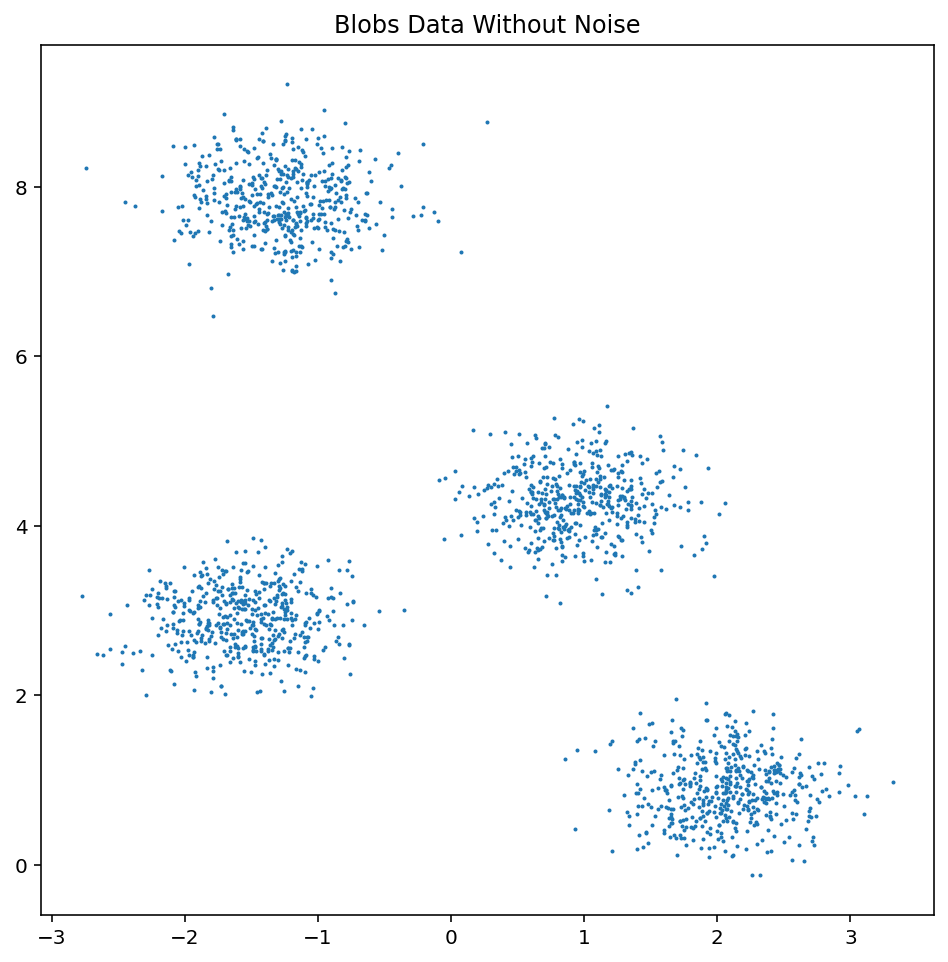

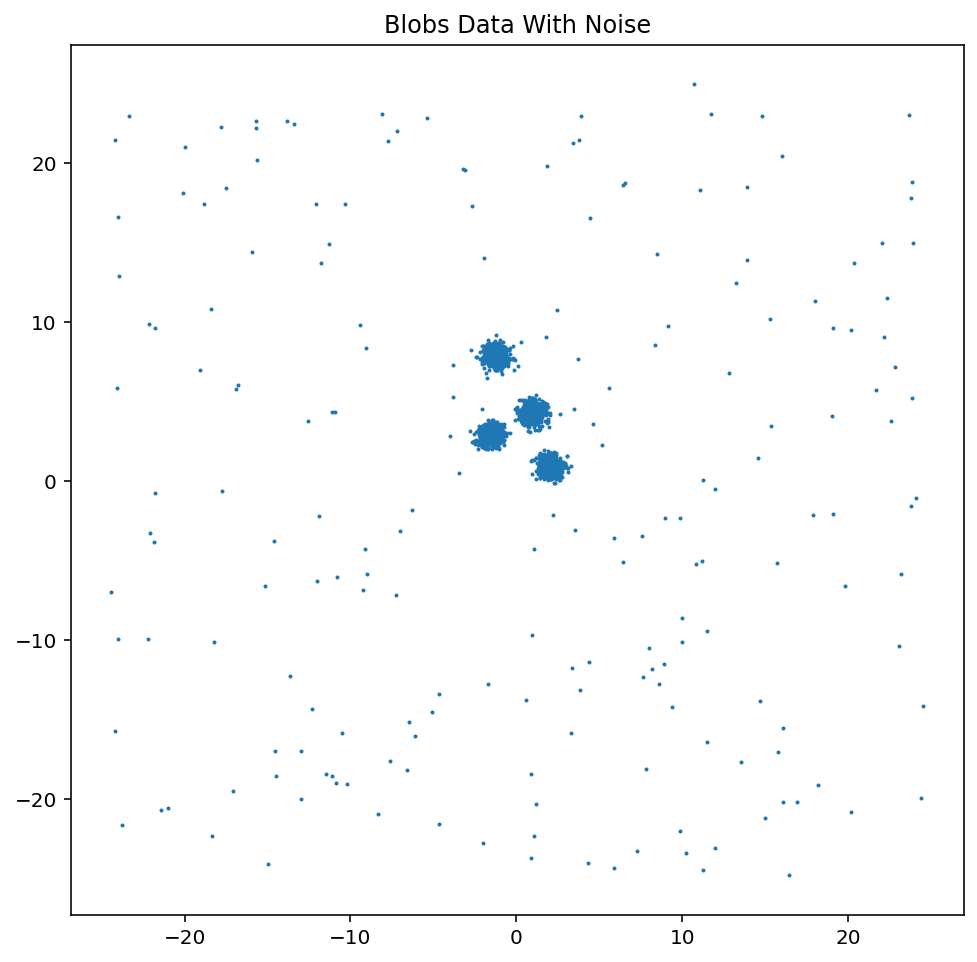

In [3]:
def getBlobsWithNoise(plotting=False):
    X, y = make_blobs(n_samples=2000, centers=4, random_state=0, cluster_std=0.4)
    if plotting:
        plt.figure(figsize=(8, 8))
        plt.scatter(X[:, 0], X[:, 1], s=1)
        plt.title('Blobs Data Without Noise')
        plt.show()
    np.random.seed(0)
    X = np.vstack((X, np.random.uniform(low=-25, high=25, size=(200, 2))))
    np.random.shuffle(X)
    if plotting:
        plt.figure(figsize=(8, 8))
        plt.scatter(X[:, 0], X[:, 1], s=1)
        plt.title('Blobs Data With Noise')
        plt.show()
    return X

X = getBlobsWithNoise(plotting=True)



## Homework


**Exercise 1:** Complete the in-class exercises if you haven't already.

**Exercise 2:** Using your choice of outlier detection method, detect and remove outliers in the pair relationship of ```life_sq``` to ```price_doc``` in the Sberbank dataset.

* Scatter plot the raw data.
* Remove rows with missing values.
* Scale just the 'life_sq' and 'price_doc' data with RobustScaler.
* Scatter plot the scaled data.
* Remove outliers and print the number of outliers.
* Scatter plot the transformed data without predicted outliers.  Most of the plot area should depict three vertically-stretched areas of highest density with surrounding diffuse inliers.  If your plot has only one small high-density area, you're not removing enough outliers.


In [3]:
df = pd.read_csv('http://cs.gettysburg.edu/~tneller/ds256/data/missing/sberbank.csv')



(end of homework)